## General pipeline

The general `mace` pipeline consists of three steps:

1. complex initialization;

2. generation of possible stereomers;

3. generation of 3D atomic coordinates for found stereomers:

In [1]:
# imports
import mace, py3Dmol
from rdkit.Chem import Draw

# view 2D (not needed, just for the better sphinx thumbmails)
def draw_mol(mol, size = (300, 300)):
    '''Returns PIL Image'''
    return Draw.MolToImage(mol, size = size)

# view 3D structures
def view_complex(X, confId = 0):
    '''Shows molecule corresponding to the SMILES'''
    view = py3Dmol.view()
    view.addModel(X.ToXYZBlock(confId = confId), 'xyz')
    view.setStyle({'stick': {'radius': 0.15}, 'sphere': {'scale': 0.3}})
    view.setBackgroundColor('white')
    view.zoomTo()
    view.show()

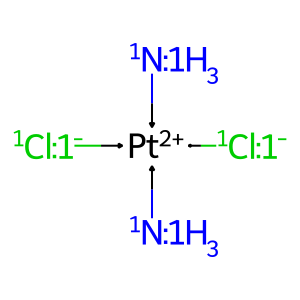

In [2]:
# initialize the complex
smiles = '[NH3:1]->[Pt+2](<-[NH3:1])(<-[Cl-:1])(<-[Cl-:1])'
X = mace.Complex(smiles = smiles, geom = 'SP')
draw_mol(X.mol)

In [3]:
# get stereomers
Xs = X.GetStereomers()
len(Xs)

2

In [4]:
# get 3D coords
for X in Xs:
    X.AddConformer()

# view
print('Isomer #1')
view_complex(Xs[0])
print('Isomer #2')
view_complex(Xs[1])

Isomer #1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Isomer #2


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In this tutorial we will go through each of these steps in detail, discussing the available parameters and their use in various scenarios.